Dataset shape: (284807, 31)
First 5 rows:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.

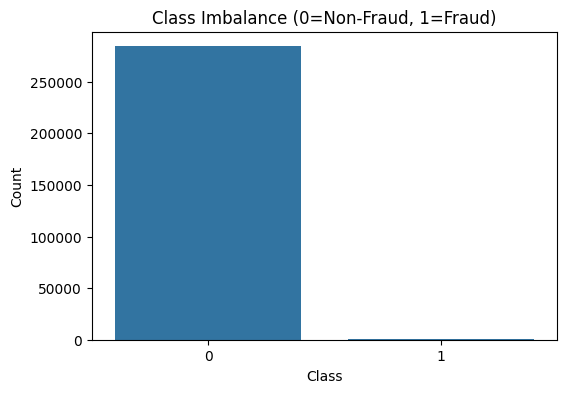

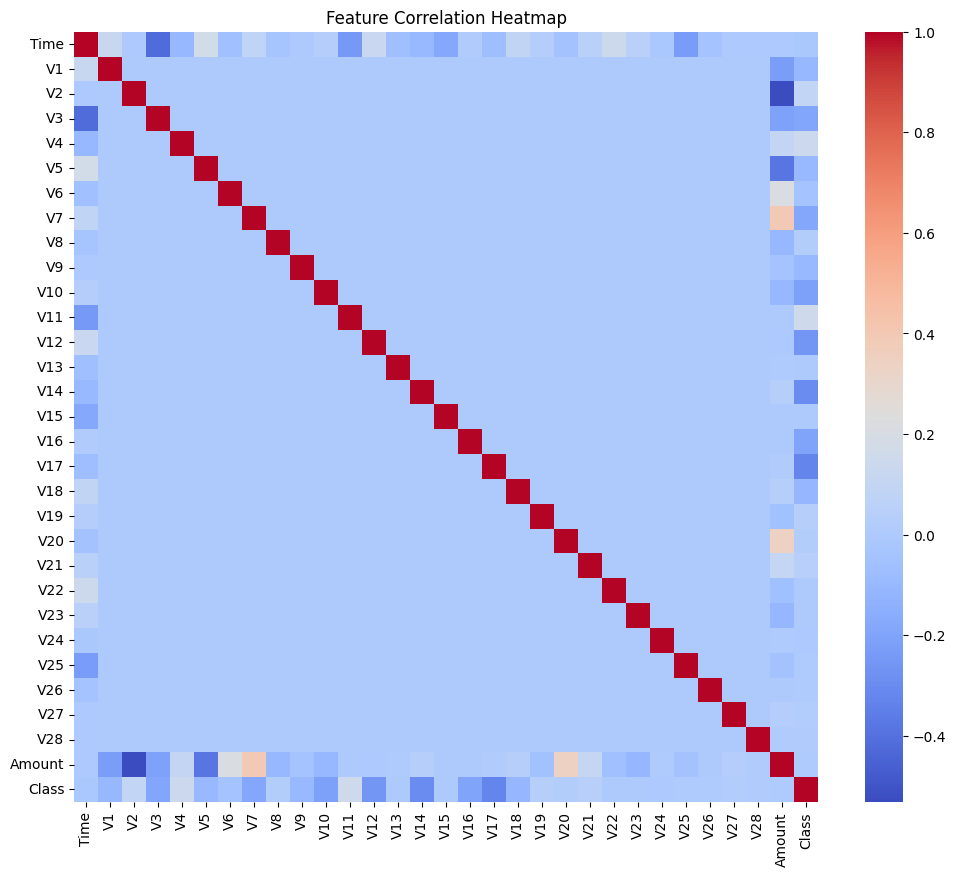


Top 5 Features positively correlated with Fraud:
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
Name: Class, dtype: float64

Top 5 Features negatively correlated with Fraud:
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


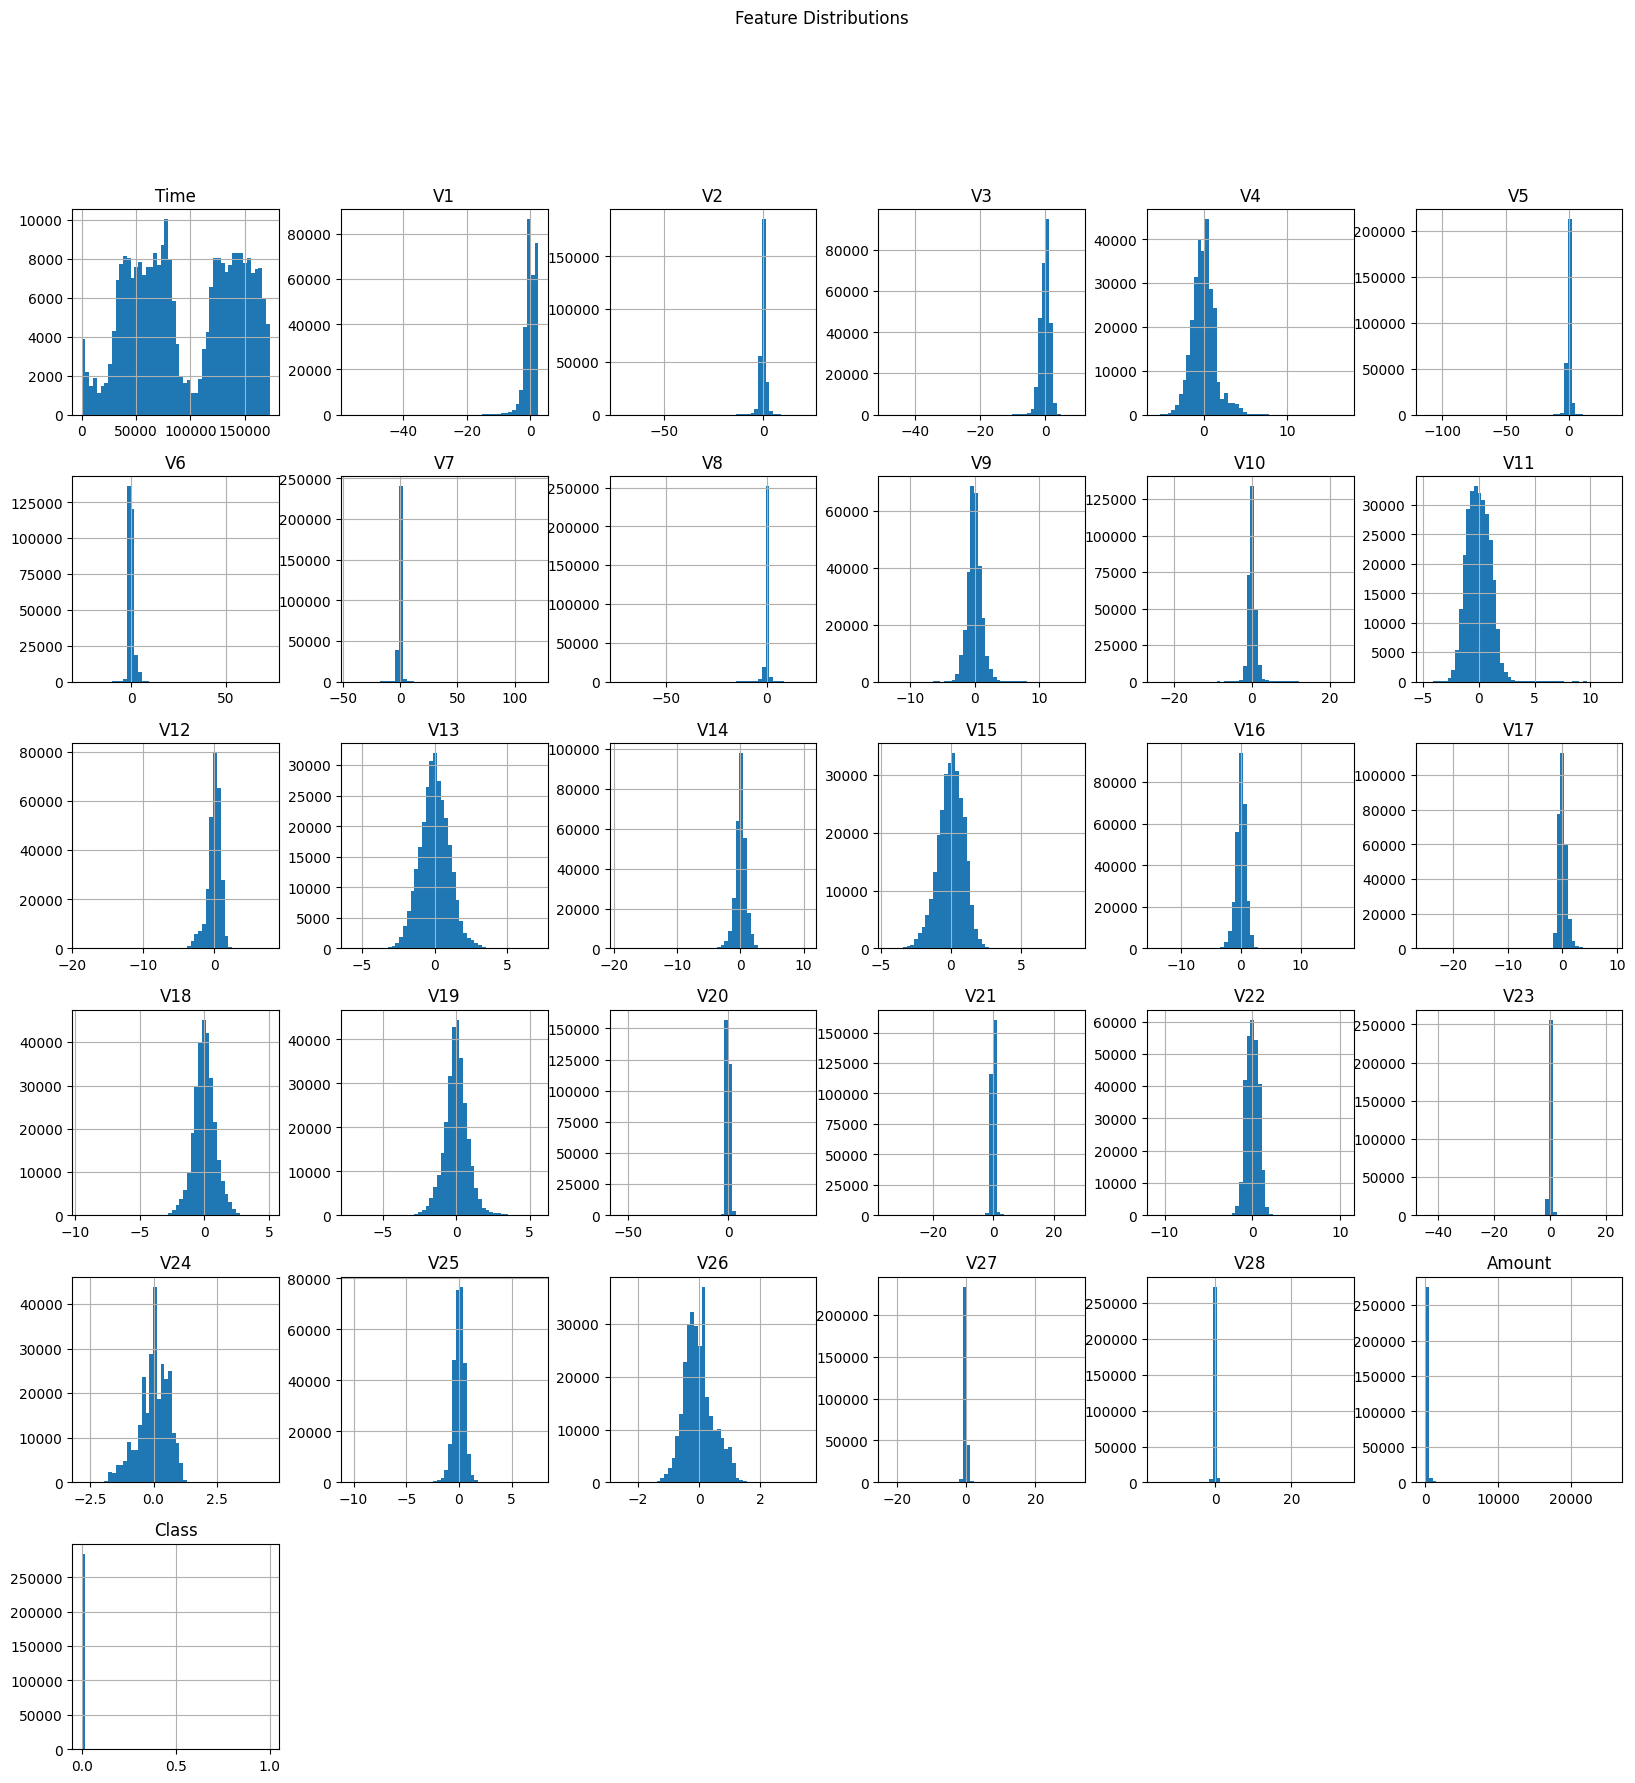

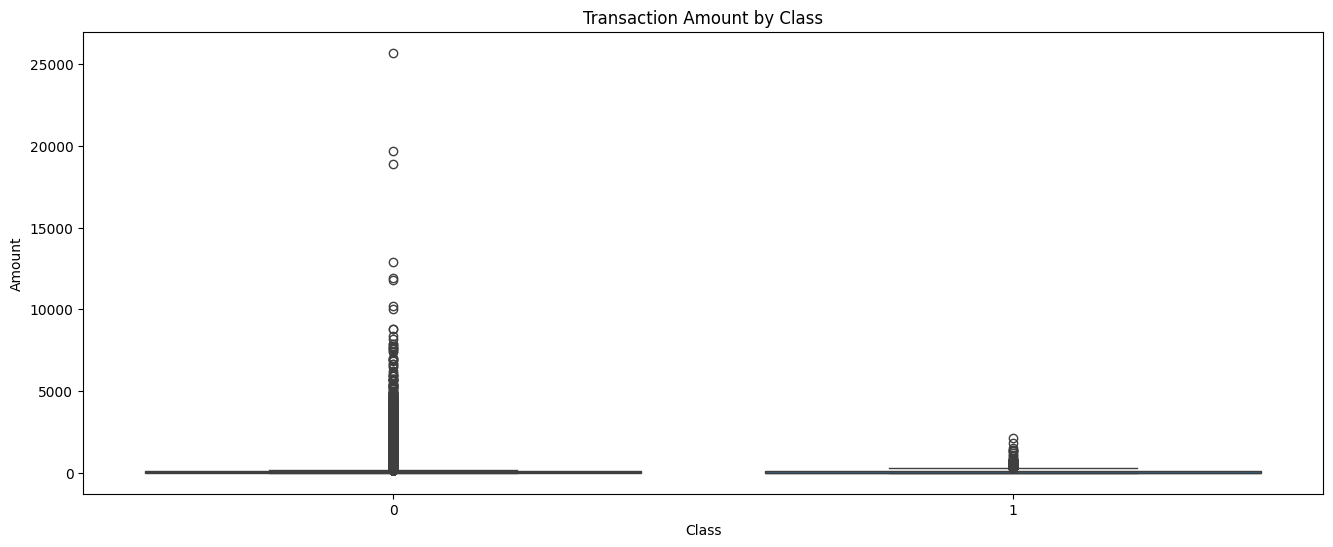

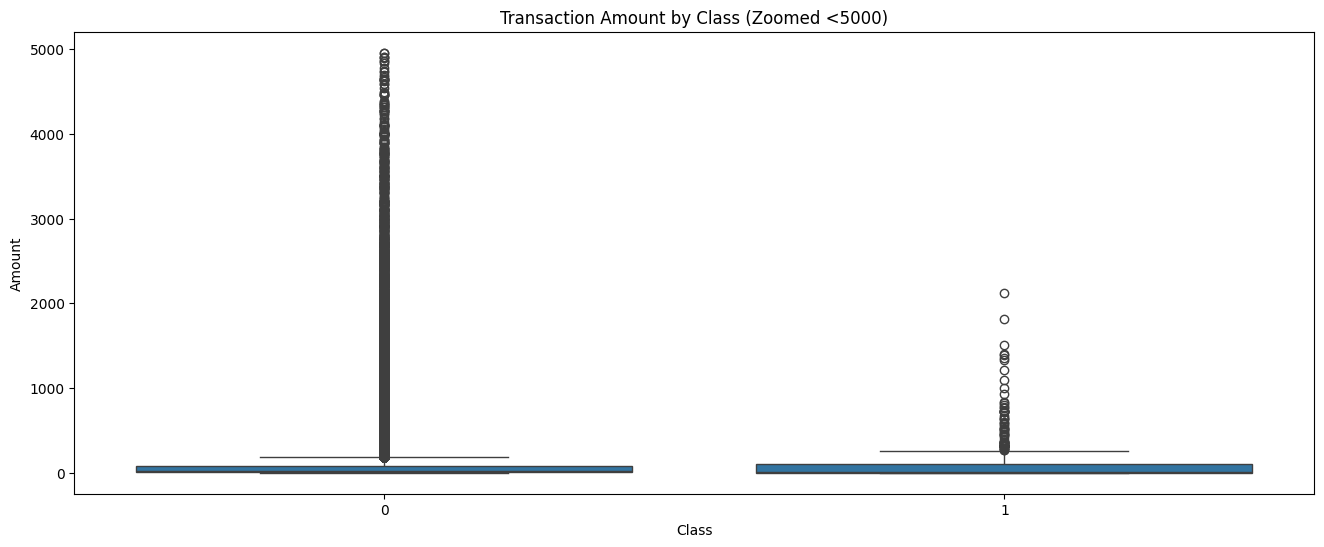

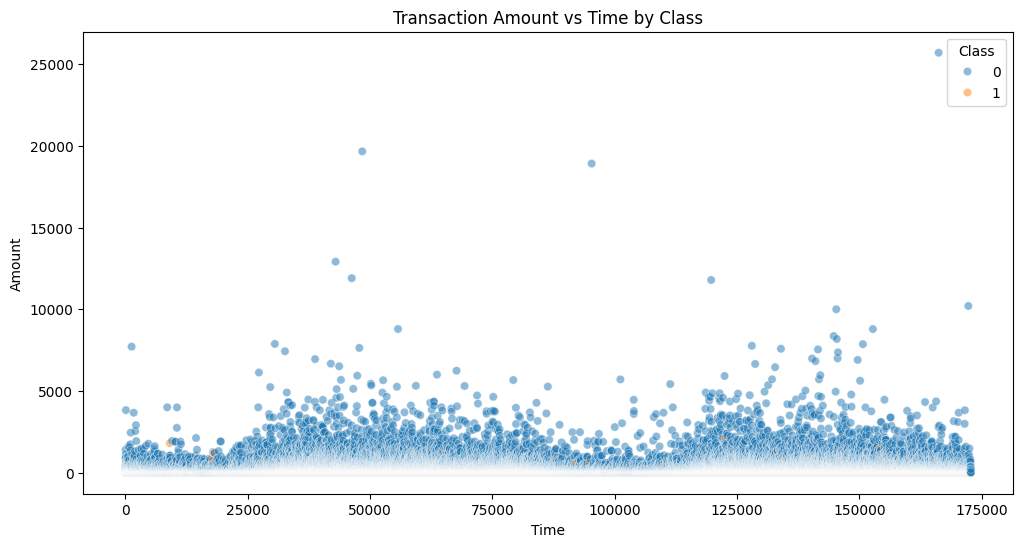


=== Fraud vs Non-Fraud Statistics ===
Class                     0             1
Time   count  284315.000000    492.000000
       mean    94838.202258  80746.806911
       std     47484.015786  47835.365138
       min         0.000000    406.000000
       25%     54230.000000  41241.500000
...                     ...           ...
Amount min         0.000000      0.000000
       25%         5.650000      1.000000
       50%        22.000000      9.250000
       75%        77.050000    105.890000
       max     25691.160000   2125.870000

[240 rows x 2 columns]


In [1]:
# ====================================================
# Credit Card Fraud Detection - Polished EDA
# ====================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 1. Load Dataset
# --------------------------
df = pd.read_csv("../data/raw/creditcard.csv")
print(f"Dataset shape: {df.shape}")
print("First 5 rows:\n", df.head())

# --------------------------
# 2. Basic Statistics
# --------------------------
print("\n=== Dataset Description ===")
print(df.describe())

# --------------------------
# 3. Class Distribution
# Reason: Check for severe class imbalance which impacts model training
# --------------------------
print("\n=== Class Counts ===")
print(df['Class'].value_counts())
print("\n=== Class Proportions ===")
print(df['Class'].value_counts(normalize=True))

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Imbalance (0=Non-Fraud, 1=Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# --------------------------
# 4. Correlation Heatmap
# Reason: Identify highly correlated features and potential multicollinearity
# --------------------------
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# --------------------------
# 5. Top Features Correlated with Fraud
# Reason: Understand which features contribute most to predicting fraud
# --------------------------
target_corr = df.corr()['Class'].sort_values(ascending=False)
print("\nTop 5 Features positively correlated with Fraud:")
print(target_corr.head(6))
print("\nTop 5 Features negatively correlated with Fraud:")
print(target_corr.tail(5))

# --------------------------
# 6. Histograms for Feature Distributions
# Reason: Detect skewed distributions or unusual patterns in features
# --------------------------
df.hist(figsize=(20,20), bins=50)
plt.suptitle("Feature Distributions")
plt.show()

# --------------------------
# 7. Boxplots for Outliers
# Reason: Identify extreme values in transaction amounts
# --------------------------
plt.figure(figsize=(16,6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount by Class")
plt.show()

# Optional zoom to see patterns without extreme outliers
plt.figure(figsize=(16,6))
sns.boxplot(x='Class', y='Amount', data=df[df['Amount']<5000])
plt.title("Transaction Amount by Class (Zoomed <5000)")
plt.show()

# --------------------------
# 8. Transaction Amount vs Time
# Reason: Check if fraud patterns vary over time
# --------------------------
plt.figure(figsize=(12,6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, alpha=0.5)
plt.title("Transaction Amount vs Time by Class")
plt.show()

# --------------------------
# 9. Class-wise Descriptive Statistics
# Reason: Compare mean/std for features between fraud and non-fraud
# --------------------------
print("\n=== Fraud vs Non-Fraud Statistics ===")
print(df.groupby('Class').describe().transpose())
